<img src='images/pic1.jpg'/>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

<h3> 3.1.2 Counting the number of rows </h3>

In [3]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:00:00.337998


<h3>3.1.3 Checking for duplicates </h3>

In [4]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data WHERE Tags IS NOT NULL \
                                  GROUP BY Title, Body, Tags LIMIT 500000', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:01:17.795018


In [5]:
df_no_dup.head()
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [6]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 5534196 ( 91.71389195843159 % )


In [7]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    315993
2    150976
3     33020
4         9
6         1
5         1
Name: cnt_dup, dtype: int64

In [8]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

Time taken to run this cell : 0:00:00.376469


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [9]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    144976
2    128685
4     99996
1     63344
5     62999
Name: tag_count, dtype: int64

In [10]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [11]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train WHERE Tags IS NOT NULL""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:20.241672


<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [12]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(),max_features=20000,ngram_range=(1,2))
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [13]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 20000


In [14]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.bash-profile', '.each', '.htaccess', '.htaccess apache2', '.htaccess cakephp', '.htaccess codeigniter', '.htaccess magento', '.htaccess mod-rewrite', '.htaccess redirect', '.htaccess rewrite']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [15]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [16]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,storyboard,1939
1,html5 html5-video,273
2,html-tag,79
3,php opencart,128
4,android css,266


In [17]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

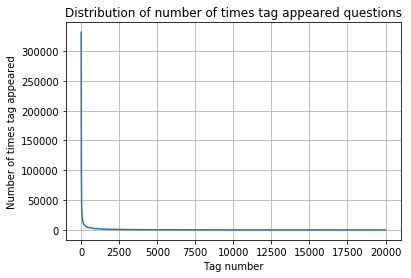

In [18]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

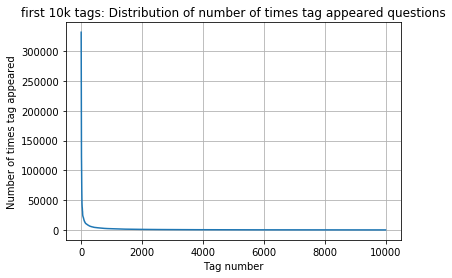

400 [331505  46769  25375  20180  15380  13157  11023  10029   9159   8197
   7528   6704   6207   5817   5421   5128   4890   4526   4314   4201
   4050   3874   3728   3609   3483   3375   3235   3091   2986   2900
   2756   2698   2617   2531   2449   2399   2331   2266   2211   2162
   2107   2061   2013   1965   1929   1876   1839   1804   1757   1723
   1695   1662   1631   1601   1555   1525   1491   1464   1444   1419
   1390   1363   1339   1317   1300   1279   1255   1240   1225   1210
   1191   1178   1163   1153   1137   1121   1109   1090   1077   1065
   1051   1038   1029   1016   1005    985    974    962    951    941
    928    918    908    894    886    878    871    862    847    839
    832    822    814    806    798    788    781    776    768    759
    747    742    735    731    725    717    711    702    694    689
    685    680    673    666    659    654    649    644    638    633
    629    623    617    613    607    603    597    590    585    582
  

In [19]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

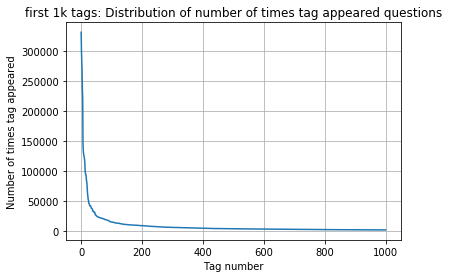

200 [331505 221533 122769  95160  69168  46769  42006  37868  33373  31069
  25375  23585  22747  21942  21006  20180  19161  18432  17640  15671
  15380  15087  14108  13532  13364  13157  12407  11897  11454  11208
  11023  10741  10525  10288  10205  10029   9981   9787   9523   9265
   9159   9079   8833   8698   8545   8197   8065   7933   7828   7684
   7528   7265   7115   7044   6856   6704   6628   6513   6447   6291
   6207   6139   6039   5971   5866   5817   5757   5669   5574   5498
   5421   5399   5360   5283   5209   5128   5083   5020   4988   4939
   4890   4785   4663   4593   4548   4526   4501   4447   4392   4335
   4314   4289   4273   4241   4233   4201   4184   4157   4142   4088
   4050   4003   3971   3947   3919   3874   3849   3822   3799   3757
   3728   3703   3685   3660   3636   3609   3583   3563   3521   3509
   3483   3468   3447   3422   3402   3375   3333   3309   3293   3272
   3235   3198   3174   3148   3108   3091   3073   3050   3032   3008
  

In [20]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

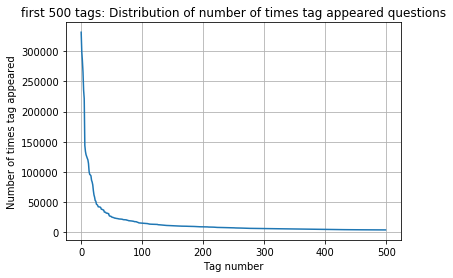

100 [331505 221533 122769  95160  69168  46769  42006  37868  33373  31069
  25375  23585  22747  21942  21006  20180  19161  18432  17640  15671
  15380  15087  14108  13532  13364  13157  12407  11897  11454  11208
  11023  10741  10525  10288  10205  10029   9981   9787   9523   9265
   9159   9079   8833   8698   8545   8197   8065   7933   7828   7684
   7528   7265   7115   7044   6856   6704   6628   6513   6447   6291
   6207   6139   6039   5971   5866   5817   5757   5669   5574   5498
   5421   5399   5360   5283   5209   5128   5083   5020   4988   4939
   4890   4785   4663   4593   4548   4526   4501   4447   4392   4335
   4314   4289   4273   4241   4233   4201   4184   4157   4142   4088]


In [21]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

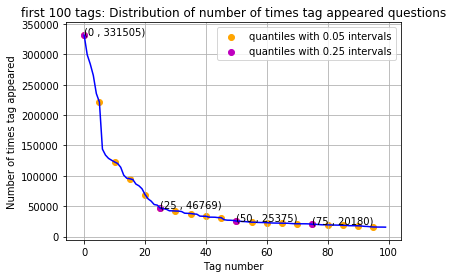

20 [331505 221533 122769  95160  69168  46769  42006  37868  33373  31069
  25375  23585  22747  21942  21006  20180  19161  18432  17640  15671]


In [22]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [23]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

178 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 178 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this problem.

<h3> 3.2.4 Tags Per Question </h3>

In [24]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206307 datapoints.
[5, 6, 3, 3, 4]


In [25]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 9
Minimum number of tags per question: 0
Avg. number of tags per question: 3.669640


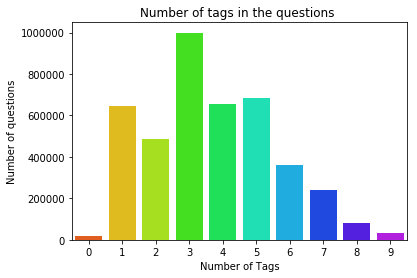

In [26]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 9
2. Minimum number of tags per question: 0
3. Avg. number of tags per question: 3.669
4. Most of the questions are having 3 or 5 tags.

<h3>3.2.5 Most Frequent Tags </h3>

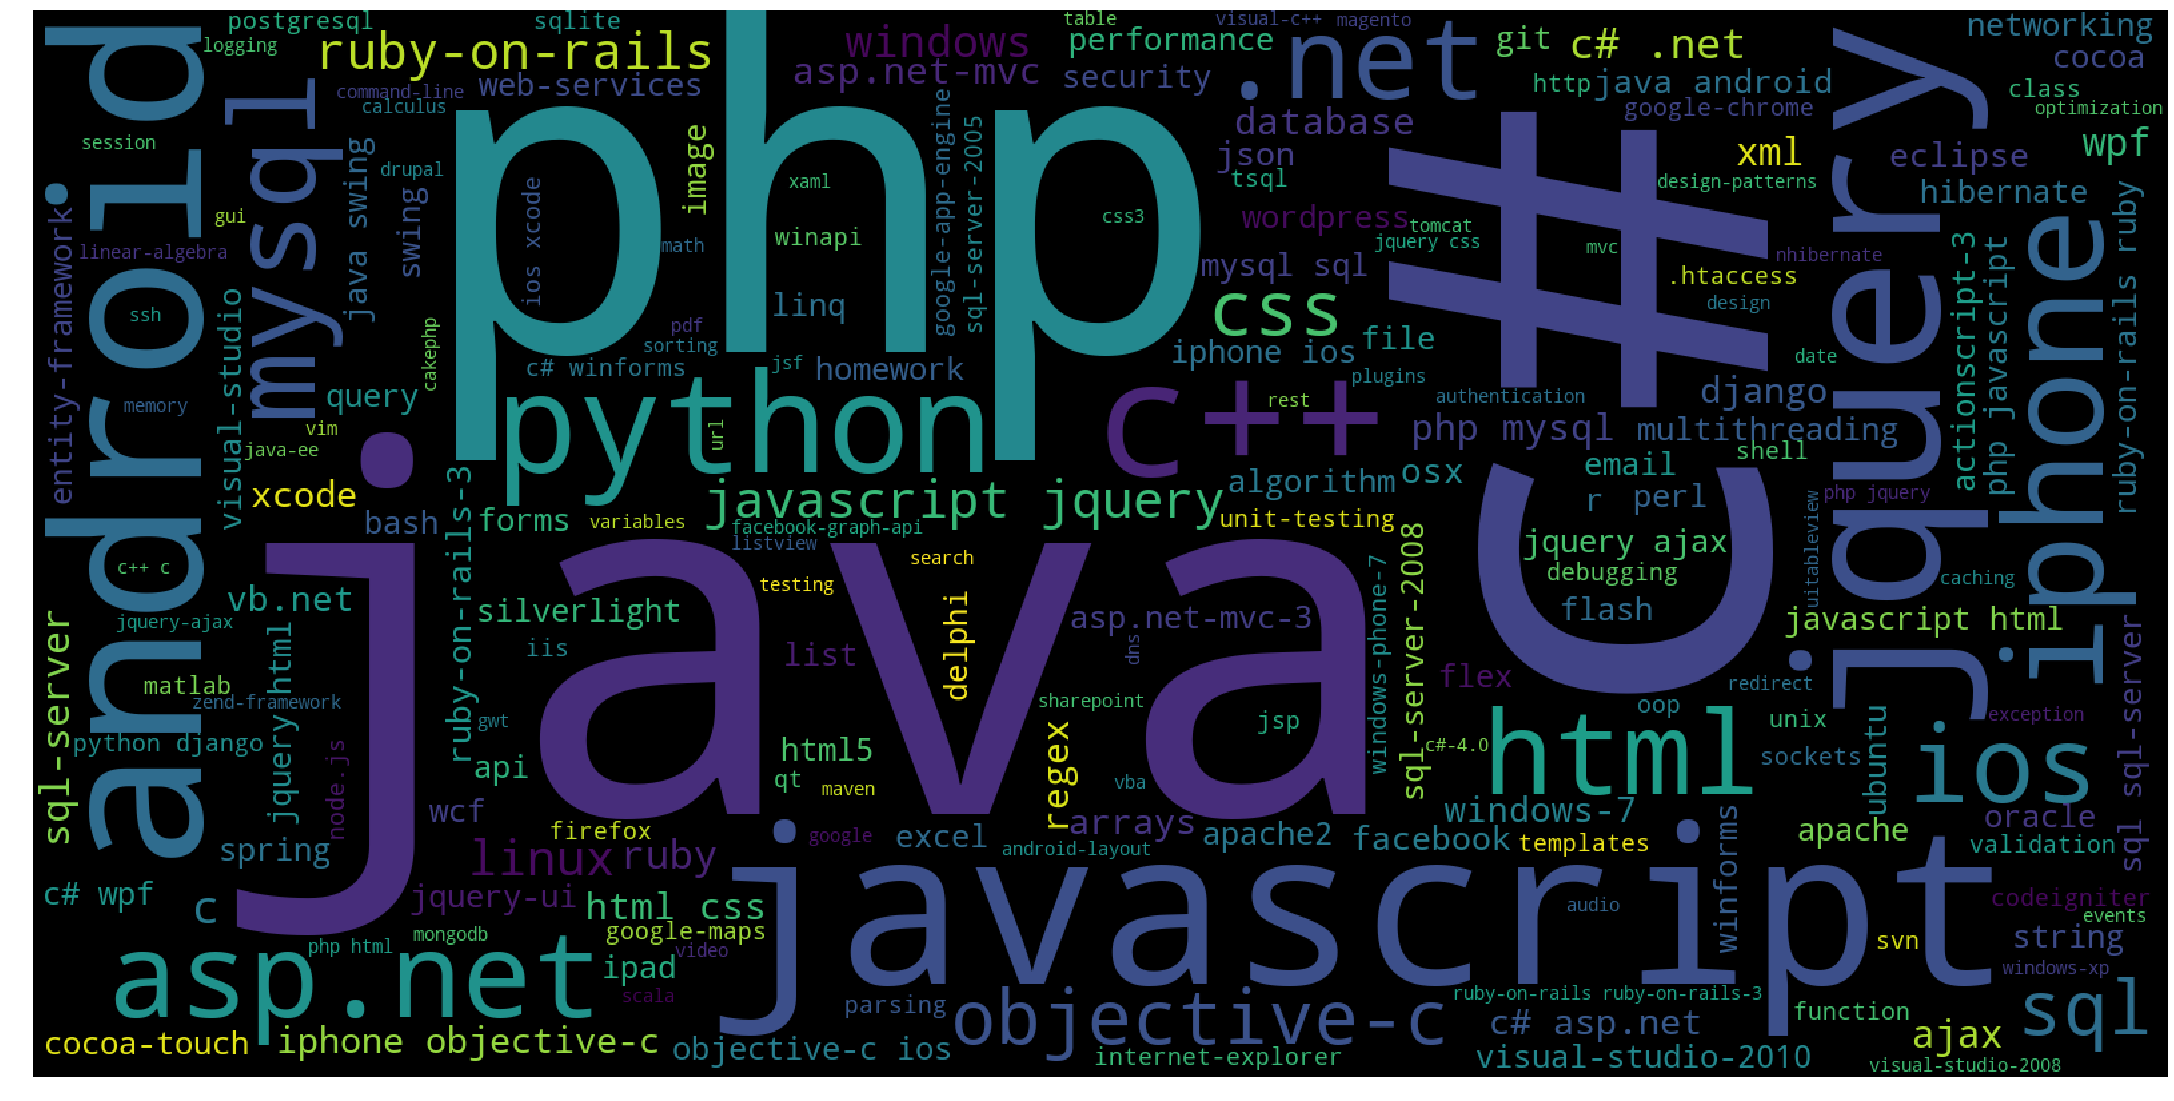

Time taken to run this cell : 0:00:05.020815


In [27]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

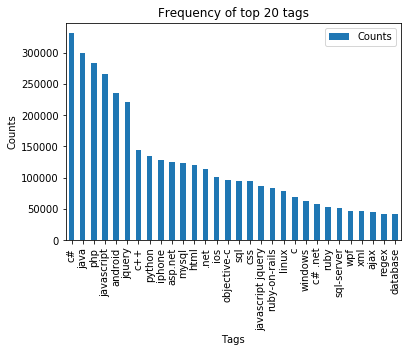

In [28]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 0.5M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [29]:
import nltk
nltk.download('stopwords')

def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sujit_biswal624882/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [31]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 50000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:26.870566


__ we create a new data base to store the sampled and preprocessed questions __

In [32]:
#### http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

import nltk
nltk.download('punkt')

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question except for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/sujit_biswal624882/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Avg. length of questions(Title+Body) before processing: 1171
Avg. length of questions(Title+Body) after processing: 325
Percent of questions containing code: 57
Time taken to run this cell : 0:01:14.824407


In [33]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [34]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('self sign certif work behind apach revers proxi want use apach revers proxi collect app server plan se ca sign ssl certif apach instanc want use self sign certif app server instanc apach app sever connect also encrypt dont want instal ca sign ssl certif app server instanc dont apach allow configur self sign certif app server instanc',)
----------------------------------------------------------------------------------------------------
('python return max number array error python script connect websit via ftp list current version number program locat websit creat array hold version number till script would pick largest number array tell exampl array would usual look like use return largest valu array unfortun receiv largest number fact latest version number nthe thing could think cut list array receiv past back get full version number sinc websit contain mani version know effici help would great appreci',)
-------------------------------------------------

In [35]:
#Taking 50K entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed WHERE TAGS IS NOT NULL""", conn_r)
conn_r.commit()
conn_r.close()

In [36]:
preprocessed_data.head()

,question,tags
0,carri exist wp user new buddypress instal made...,buddypress
1,self sign certif work behind apach revers prox...,apache ssl
2,python return max number array error python sc...,python arrays numbers max
3,auto start applic user login mac java program ...,packagemaker autostart
4,xcode ctrl drag edit code snippet xcode ctrl d...,xcode4


In [37]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 49999
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [38]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true',max_features=20000,ngram_range=(1,2))
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [39]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [40]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

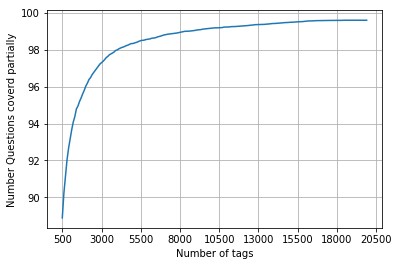

with  5500 tags we are covering  98.496 % of questions


In [41]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [42]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 752 out of  49999


In [43]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 20000
number of tags taken : 5500 ( 27.500000000000004 %)


__ We consider top 15% tags which covers  99% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [44]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [45]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (39999, 5500)
Number of data points in test data : (10000, 5500)


<h2>4.3 Featurizing data </h2>

In [46]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,2))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:11.048061


In [47]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (39999, 94094) Y : (39999, 5500)
Dimensions of test data X: (10000, 94094) Y: (10000, 5500)


In [48]:
# https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
#https://stats.stackexchange.com/questions/117796/scikit-multi-label-classification
# classifier = LabelPowerset(GaussianNB())
"""
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=21)

# train
classifier.fit(x_train_multilabel, y_train)

# predict
predictions = classifier.predict(x_test_multilabel)
print(accuracy_score(y_test,predictions))
print(metrics.f1_score(y_test, predictions, average = 'macro'))
print(metrics.f1_score(y_test, predictions, average = 'micro'))
print(metrics.hamming_loss(y_test,predictions))

"""
# we are getting memory error because the multilearn package 
# is trying to convert the data into dense matrix
# ---------------------------------------------------------------------------
#MemoryError                               Traceback (most recent call last)
#<ipython-input-170-f0e7c7f3e0be> in <module>()
#----> classifier.fit(x_train_multilabel, y_train)

"\nfrom skmultilearn.adapt import MLkNN\nclassifier = MLkNN(k=21)\n\n# train\nclassifier.fit(x_train_multilabel, y_train)\n\n# predict\npredictions = classifier.predict(x_test_multilabel)\nprint(accuracy_score(y_test,predictions))\nprint(metrics.f1_score(y_test, predictions, average = 'macro'))\nprint(metrics.f1_score(y_test, predictions, average = 'micro'))\nprint(metrics.hamming_loss(y_test,predictions))\n\n"

<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

In [49]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test,predictions))
print("Macro F1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("Micro F1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("Hamming Loss :",metrics.hamming_loss(y_test,predictions))

report = metrics.classification_report(y_test, predictions,output_dict=True)
ovr_classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 5500 in Total
print("Precision recall report :\n")
print(ovr_classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0713
Macro F1 score : 0.06971582995764285
Micro F1 score : 0.32809117080250294
Hamming Loss : 0.0005134727272727272
  
Precision recall report :

      f1-score  precision    recall  support
0     0.324421   0.549849  0.230088    791.0
1     0.552147   0.773956  0.429155    734.0
10    0.709163   0.847619  0.609589    292.0
100   0.468750   0.681818  0.357143     42.0
1000  0.000000   0.000000  0.000000      2.0
1001  0.000000   0.000000  0.000000      3.0
1002  0.000000   0.000000  0.000000      2.0
1003  0.000000   0.000000  0.000000      4.0
1004  0.000000   0.000000  0.000000     10.0
1005  0.000000   0.000000  0.000000      5.0
 
Time taken to run this cell : 0:28:27.868461


In [50]:
#joblib_in = open("lr_with_equal_weight.pkl","rb")
#classifier = joblib.load(joblib_in)

<h2> 4.5 Modeling with less data points (50K data points) and more weight to title and 500 tags only. </h2>

In [51]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [52]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 40000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 50K rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 50001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


<h3> 4.5.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [53]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1224
Avg. length of questions(Title+Body) after processing: 437
Percent of questions containing code: 56
Time taken to run this cell : 0:01:56.713871


In [54]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Sample quesitons after preprocessing of data __

In [55]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advance..',)
----------------------------------------------------------------------------------------------------
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java.sql.sqlexcept microsoft odbc driver

__ Saving Preprocessed data to a Database __

In [56]:
#Taking 50K entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [57]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
2,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
3,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
4,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk


In [58]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 50000
number of dimensions : 2


__ Converting string Tags to multilable output variables __ 

In [59]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true',max_features=20000,ngram_range=(1,2))
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ Selecting 500 Tags __

In [60]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

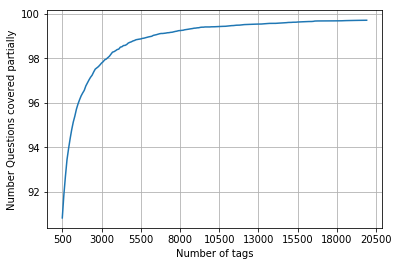

with  5500 tags we are covering  98.88 % of questions
with  500 tags we are covering  90.818 % of questions


In [61]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions covered partially")
plt.grid()
plt.show()

# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [62]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 4591 out of  50000


In [63]:
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 40000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [64]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 500)
Number of data points in test data : (10000, 500)


In [65]:
print(preprocessed_data.shape[0])

50000


# Application of TFIDF :- 

<h3> 4.5.2 Featurizing Data with TFIDF Vectorizer </h3>

In [66]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,2))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:12.606605


In [67]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 20000) Y : (40000, 500)
Dimensions of test data X: (10000, 20000) Y: (10000, 500)


<h3> 4.5.3 (TFIDF) Applying Logistic Regression :- OneVsRest Classifier + SGDClassifier (loss='log') </h3> </h3>

In [68]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming Loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print (" ")

report = metrics.classification_report(y_test, predictions,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.207
Hamming Loss  0.0033218
Micro-average quality numbers
Precision: 0.6645, Recall: 0.2679, F1-measure: 0.3819
Macro-average quality numbers
Precision: 0.4635, Recall: 0.2007, F1-measure: 0.2610
 
  
Precision recall report :

     f1-score  precision    recall  support
0    0.318937   0.623377  0.214286    224.0
1    0.305419   0.642487  0.200323    619.0
10   0.366947   0.623810  0.259921    504.0
100  0.521739   0.750000  0.400000     30.0
101  0.378788   0.714286  0.257732     97.0
102  0.192308   0.312500  0.138889     36.0
103  0.196078   0.333333  0.138889     36.0
104  0.312500   0.500000  0.227273     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.045455   0.111111  0.028571     35.0
 
Time taken to run this cell : 0:00:24.330834


In [69]:
#joblib.dump(classifier, 'lr_with_more_title_weight.pkl')

<h3> 4.5.4 (TFIDF) Applying Logistic Regression :- OneVsRest Classifier + Logistic Regression </h3> </h3>

In [70]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l2'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming Loss ",metrics.hamming_loss(y_test,predictions_2))

precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

report = metrics.classification_report(y_test, predictions_2,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.1596
Hamming Loss  0.0034734
Micro-average quality numbers
Precision: 0.7952, Recall: 0.1253, F1-measure: 0.2165
Macro-average quality numbers
Precision: 0.2431, Recall: 0.0495, F1-measure: 0.0762
  
Precision recall report :

     f1-score  precision    recall  support
0    0.325260   0.723077  0.209821    224.0
1    0.220708   0.704348  0.130856    619.0
10   0.257329   0.718182  0.156746    504.0
100  0.235294   1.000000  0.133333     30.0
101  0.150943   0.888889  0.082474     97.0
102  0.097561   0.400000  0.055556     36.0
103  0.142857   0.500000  0.083333     36.0
104  0.160000   0.666667  0.090909     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.054054   0.500000  0.028571     35.0
 
Time taken to run this cell : 0:00:41.021962


<h3> 4.5.5 (TFIDF) Hyperparameter Tuning on "Logistic Regression :- OneVsRest Classifier + SGDClassifier(loss='log')" </h3> </h3> </h3>

In [87]:
x_cv_multilabel = x_train_multilabel[32000:40000]

start_time = datetime.now()
warnings.filterwarnings('ignore')
params = {"estimator__alpha":C_hyperparam}
#Carrying out 5-fold Cross Validation.

logistic = OneVsRestClassifier(SGDClassifier(loss='log',penalty='l1'), n_jobs=-1)
TFIDF_model1 = GridSearchCV(logistic,params,scoring='f1_micro', cv=5,n_jobs=1,verbose=1)
TFIDF_model1.fit(x_train_multilabel,y_train)

print("Time Required to Carry out Hyperparameter Tuning :- ", datetime.now()-start_time)
print("Best Values Obtained :-", TFIDF_model1.best_estimator_)
print("Best Cross Validation Score :-", TFIDF_model1.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 12.3min finished


Time Required to Carry out Hyperparameter Tuning :-  0:12:44.195745
Best Values Obtained :- OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-06, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=-1)
Best Cross 

<h3> 4.5.6 Applying Optimized Logistic Regression :- "SGDClassifier(loss='log') + OneVsRest Classifier" on Test Dataset  </h3>

In [88]:
classifier = OneVsRestClassifier(estimator=SGDClassifier(alpha=10**(-6), average=False,class_weight=None,
             early_stopping=False, epsilon=0.1,eta0=0.0, fit_intercept=True,l1_ratio=0.15,learning_rate='optimal', 
             loss='log',max_iter=1000, n_iter_no_change=5,n_jobs=None, penalty='l1',power_t=0.5, random_state=None,
             shuffle=True, tol=0.001,validation_fraction=0.1, verbose=0,warm_start=False),n_jobs=-1)

In [89]:
start = datetime.now()

classifier.fit(x_train_multilabel, y_train)
predictions =classifier.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test,predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1= f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision,recall,f1))

precision  = precision_score(y_test,predictions, average='macro')
recall = recall_score(y_test,predictions, average='macro')
f1 = f1_score(y_test,predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

report = metrics.classification_report(y_test, predictions,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.1815
Hamming loss  0.0036454
Micro-average quality numbers
Precision: 0.5426, Recall: 0.3070, F1-measure: 0.3921
Macro-average quality numbers
Precision: 0.4277, Recall: 0.2226, F1-measure: 0.2742
  
Precision recall report :

     f1-score  precision    recall  support
0    0.278481   0.264000  0.294643    224.0
1    0.357333   0.397233  0.324717    619.0
10   0.368742   0.479365  0.299603    504.0
100  0.521739   0.750000  0.400000     30.0
101  0.342857   0.558140  0.247423     97.0
102  0.222222   0.333333  0.166667     36.0
103  0.192308   0.312500  0.138889     36.0
104  0.352941   0.500000  0.272727     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.090909   0.222222  0.057143     35.0
 
Time taken to run this cell : 0:00:29.102101


# Application of BOW - Upto Bi-Grams :- 

<h3> 5.1 Featurizing data with BOW Vectorizer </h3>

In [73]:
start = datetime.now()
BOW_vectorizer = CountVectorizer(min_df=0.00009,max_features=20000,
                                 tokenizer = lambda x: x.split(), ngram_range=(1,2))
x_bow_train_multilabel = BOW_vectorizer.fit_transform(x_train['question'])
x_bow_test_multilabel = BOW_vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:13.971770


In [74]:
print("Dimensions of train data X:",x_bow_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_bow_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 20000) Y : (40000, 500)
Dimensions of test data X: (10000, 20000) Y: (10000, 500)


<h3> 5.2 (BOW) Applying Logistic Regression :- OneVsRest Classifier + SGDClassifier (loss='log') </h3> </h3>

In [75]:
start = datetime.now()
classifier2 = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=1)
classifier2.fit(x_bow_train_multilabel, y_train)
predictions2 = classifier2.predict (x_bow_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions2))

precision2 = precision_score(y_test, predictions2, average='micro')
recall2 = recall_score(y_test, predictions2, average='micro')
f1_2 = f1_score(y_test, predictions2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision2, recall2, f1_2))

precision2 = precision_score(y_test, predictions2, average='macro')
recall2 = recall_score(y_test, predictions2, average='macro')
f1_2 = f1_score(y_test, predictions2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision2, recall2, f1_2))

report = metrics.classification_report(y_test, predictions2, output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0645
Hamming loss  0.0098328
Micro-average quality numbers
Precision: 0.1601, Recall: 0.3690, F1-measure: 0.2233
Macro-average quality numbers
Precision: 0.1102, Recall: 0.2771, F1-measure: 0.1435
  
Precision recall report :

     f1-score  precision    recall  support
0    0.198758   0.137694  0.357143    224.0
1    0.339324   0.305699  0.381260    619.0
10   0.347261   0.326353  0.371032    504.0
100  0.158273   0.100917  0.366667     30.0
101  0.372093   0.426667  0.329897     97.0
102  0.115226   0.067633  0.388889     36.0
103  0.136646   0.088000  0.305556     36.0
104  0.155340   0.098765  0.363636     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.065574   0.040541  0.171429     35.0
 
Time taken to run this cell : 0:17:20.428468


<h3> 5.3 (BOW) Applying Logistic Regression :- OneVsRest Classifier + Logistic Regression </h3> </h3>

In [76]:
start = datetime.now()
classifier3 = OneVsRestClassifier(LogisticRegression(C=1.0,penalty='l2'), n_jobs=1)
classifier3.fit(x_bow_train_multilabel, y_train)
predictions3 = classifier3.predict (x_bow_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions3))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions3))

precision3 = precision_score(y_test, predictions3, average='micro')
recall3 = recall_score(y_test, predictions3, average='micro')
f1_3= f1_score(y_test, predictions3, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision3, recall3, f1_3))

precision3 = precision_score(y_test, predictions3, average='macro')
recall3 = recall_score(y_test, predictions3, average='macro')
f1_3 = f1_score(y_test, predictions3, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision3, recall3, f1_3))

report = metrics.classification_report(y_test, predictions3,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.1707
Hamming loss  0.0037462
Micro-average quality numbers
Precision: 0.5206, Recall: 0.2764, F1-measure: 0.3611
Macro-average quality numbers
Precision: 0.3819, Recall: 0.1916, F1-measure: 0.2401
  
Precision recall report :

     f1-score  precision    recall  support
0    0.289044   0.302439  0.276786    224.0
1    0.367424   0.443936  0.313409    619.0
10   0.344473   0.489051  0.265873    504.0
100  0.474576   0.482759  0.466667     30.0
101  0.302158   0.500000  0.216495     97.0
102  0.233333   0.291667  0.194444     36.0
103  0.218182   0.315789  0.166667     36.0
104  0.193548   0.333333  0.136364     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.000000   0.000000  0.000000     35.0
 
Time taken to run this cell : 0:29:07.881966


<h3> 5.4 (BOW) Hyperparameter Tuning on "Logistic Regression :- OneVsRest Classifier + Logistic Regression" </h3> </h3> </h3>

In [77]:
C_hyperparam =[]
#initializing an empty list

for a in range(-6,7,2):
    C_hyperparam.append(10**a)
    
print(C_hyperparam)

[1e-06, 0.0001, 0.01, 1, 100, 10000, 1000000]


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#performing scaling
Scaler1 = StandardScaler(with_mean=False)
X_Train_SCBOW = Scaler1.fit_transform(x_bow_train_multilabel)
X_Test_SCBOW = Scaler1.transform(x_bow_test_multilabel)

Basically to carry out the Hyperparameter Tuning with the CV Dataset, we first need to obtain the CV Data :- We will be carrying out Simple CV instead of GridSearchCV so as to minimise the Time Complexity for the same. 

We will obtain the CV Dataset by splitting the Train Dataset :- x_bow_train_multilabel in the 80:20 ratio. 

In [79]:
#Obtaining the CV Dataset from the Train Dataset :- X_CV
x_bow_cv_multilabel = x_bow_train_multilabel[32000:40000]
X_CV_SCBOW = Scaler1.transform(x_bow_cv_multilabel)

print(X_CV_SCBOW.shape)

(8000, 20000)


In [80]:
#Obtaining the CV Dataset from the Train Dataset :- Y_CV
y_cv = y_train[32000:40000]
print(y_cv.shape)

(8000, 500)


<h3>  (BOW) Hyperparameter Tuning using GridSearch on Better Model :- </h3> </h3> </h3>

In [82]:
start_time = datetime.now()
warnings.filterwarnings('ignore')
params  = {"estimator__C":C_hyperparam}

#Carrying out 5-fold Cross Validation.

logistic = OneVsRestClassifier(LogisticRegression(penalty='l2'), n_jobs=1)
BOW_model1 = GridSearchCV(logistic,params,scoring='f1_micro', cv=5,n_jobs=1,verbose=1)
BOW_model1.fit(X_Train_SCBOW,y_train)

print("Time Required to Carry out Hyperparameter Tuning :- ", datetime.now()-start_time)
print("Best Values Obtained :-", BOW_model1.best_estimator_)
print("Best Cross Validation Score :-", BOW_model1.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 683.6min finished


Time Required to Carry out Hyperparameter Tuning :-  12:02:43.933640
Best Values Obtained :- OneVsRestClassifier(estimator=LogisticRegression(C=100, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=1)
Best Cross Validation Score :- 0.307864297932658


<h3> 5.5 Applying Optimized Logistic Regression :- "Logistic Regression + OneVsRest Classifier" on Test Dataset  </h3>

In [81]:
BOW_classifier = OneVsRestClassifier(LogisticRegression(C=100, class_weight=None,
                 dual=False, fit_intercept=True,intercept_scaling=1,l1_ratio=None, max_iter=100,multi_class='auto',
                 n_jobs=None, penalty='l2',random_state=None,solver='lbfgs', tol=0.0001,verbose=0, warm_start=False), n_jobs=1)

In [82]:
start = datetime.now()
BOW_classifier = OneVsRestClassifier(LogisticRegression(C=100,penalty='l2'), n_jobs=1)
BOW_classifier.fit(x_bow_train_multilabel, y_train)
BOW_predictions = BOW_classifier.predict(x_bow_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, BOW_predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,BOW_predictions))

BOW_precision = precision_score(y_test, BOW_predictions, average='micro')
BOW_recall = recall_score(y_test, BOW_predictions, average='micro')
BOW_f1= f1_score(y_test, BOW_predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(BOW_precision, BOW_recall, BOW_f1))

BOW_precision  = precision_score(y_test,BOW_predictions, average='macro')
BOW_recall = recall_score(y_test,BOW_predictions, average='macro')
BOW_f1 = f1_score(y_test,BOW_predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(BOW_precision, BOW_recall, BOW_f1))

report = metrics.classification_report(y_test,BOW_predictions,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.1498
Hamming loss  0.004091
Micro-average quality numbers
Precision: 0.4489, Recall: 0.2994, F1-measure: 0.3592
Macro-average quality numbers
Precision: 0.3543, Recall: 0.2098, F1-measure: 0.2482
  
Precision recall report :

     f1-score  precision    recall  support
0    0.240708   0.199413  0.303571    224.0
1    0.353511   0.353226  0.353796    619.0
10   0.357820   0.444118  0.299603    504.0
100  0.451613   0.437500  0.466667     30.0
101  0.315068   0.469388  0.237113     97.0
102  0.253968   0.296296  0.222222     36.0
103  0.245614   0.333333  0.194444     36.0
104  0.294118   0.416667  0.227273     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.000000   0.000000  0.000000     35.0
 
Time taken to run this cell : 0:33:49.036671


# Application of Linear SVM :- 

<h3> 5.6 (BOW) Applying Linear SVM :- OneVsRest Classifier + SGDClassifier (loss='hinge') </h3> </h3>

In [83]:
start = datetime.now()
classifier4 = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=1)
classifier4.fit(x_train_multilabel,y_train)
predictions4 = classifier4.predict (x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions4))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions4))

precision4 = precision_score(y_test, predictions4, average='micro')
recall4 = recall_score(y_test, predictions4, average='micro')
f1_4 = f1_score(y_test, predictions4, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision4, recall4, f1_4))

precision4 = precision_score(y_test, predictions4, average='macro')
recall4 = recall_score(y_test, predictions4, average='macro')
f1_4 = f1_score(y_test, predictions4, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision4, recall4, f1_4))

report = metrics.classification_report(y_test, predictions4,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2122
Hamming loss  0.0032816
Micro-average quality numbers
Precision: 0.6765, Recall: 0.2744, F1-measure: 0.3904
Macro-average quality numbers
Precision: 0.3895, Recall: 0.1989, F1-measure: 0.2441
  
Precision recall report :

     f1-score  precision    recall  support
0    0.321637   0.466102  0.245536    224.0
1    0.345652   0.528239  0.256866    619.0
10   0.323319   0.579487  0.224206    504.0
100  0.500000   0.666667  0.400000     30.0
101  0.358209   0.648649  0.247423     97.0
102  0.000000   0.000000  0.000000     36.0
103  0.054054   1.000000  0.027778     36.0
104  0.275862   0.571429  0.181818     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.000000   0.000000  0.000000     35.0
 
Time taken to run this cell : 0:01:56.350026


<h3> 5.7 (BOW) Applying Linear SVM :- OneVsRest Classifier + Linear SVC </h3> </h3>

In [84]:
from sklearn.svm import LinearSVC

start = datetime.now()
classifier5 = OneVsRestClassifier(LinearSVC(loss='squared_hinge',C=1.0, penalty='l2'), n_jobs=1)
classifier5.fit(x_train_multilabel, y_train)
predictions5 = classifier5.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions5))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions5))

precision5 = precision_score(y_test, predictions5, average='micro')
recall5 = recall_score(y_test, predictions5, average='micro')
f1_5 = f1_score(y_test, predictions5, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision5, recall5, f1_5))

precision5 = precision_score(y_test, predictions5, average='macro')
recall5 = recall_score(y_test, predictions5, average='macro')
f1_5 = f1_score(y_test, predictions5, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision5, recall5, f1_5))

report = metrics.classification_report(y_test, predictions5,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2114
Hamming loss  0.0032714
Micro-average quality numbers
Precision: 0.7029, Recall: 0.2525, F1-measure: 0.3716
Macro-average quality numbers
Precision: 0.4377, Recall: 0.1723, F1-measure: 0.2292
  
Precision recall report :

     f1-score  precision    recall  support
0    0.364198   0.590000  0.263393    224.0
1    0.347144   0.565693  0.250404    619.0
10   0.356125   0.631313  0.248016    504.0
100  0.511628   0.846154  0.366667     30.0
101  0.343750   0.709677  0.226804     97.0
102  0.095238   0.333333  0.055556     36.0
103  0.097561   0.400000  0.055556     36.0
104  0.214286   0.500000  0.136364     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.000000   0.000000  0.000000     35.0
 
Time taken to run this cell : 0:01:17.783593


<h3> 5.8 (BOW) Hyperparameter Tuning on "Linear SVM :- OneVsRest Classifier + Linear SVC" </h3> </h3> </h3>

In [96]:
from sklearn.model_selection import GridSearchCV

start_time = datetime.now()
warnings.filterwarnings('ignore')
params  = {"estimator__alpha":C_hyperparam}

#Carrying out 5-fold Cross Validation. 

svm = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1'), n_jobs=1)
svm_model1 = GridSearchCV(svm,params,scoring='f1_micro', cv=5,n_jobs=1,verbose=1)
svm_model1.fit(x_train_multilabel,y_train)

print("Time Required to Carry out Hyperparameter Tuning :- ", datetime.now()-start_time)
print("Best Values Obtained :-", svm_model1.best_estimator_)
print("Best Cross Validation Score :-", svm_model1.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 59.0min finished


Time Required to Carry out Hyperparameter Tuning :-  1:01:42.124050
Best Values Obtained :- OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-06, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l1', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=1)
Best Cross

<h3> 5.9 Applying Optimized Linear SVM :- "OneVsRest Classifier + SGDClassifier" on Test Dataset  </h3>

In [85]:
from sklearn.svm import LinearSVC
SVM_classifier = OneVsRestClassifier(SGDClassifier(alpha=10**(-6), average=False,
                 class_weight=None,early_stopping=False, epsilon=0.1,eta0=0.0, fit_intercept=True,l1_ratio=0.15,
                 learning_rate='optimal',loss='hinge', max_iter=1000,n_iter_no_change=5, n_jobs=None,penalty='l1',
                 power_t=0.5,random_state=None, shuffle=True,tol=0.001, validation_fraction=0.1, 
                 verbose=0, warm_start=False))

In [86]:
start = datetime.now()

SVM_classifier.fit(x_train_multilabel, y_train)
SVM_predictions = SVM_classifier.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, SVM_predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,SVM_predictions))

SVM_precision = precision_score(y_test, SVM_predictions, average='micro')
SVM_recall = recall_score(y_test, SVM_predictions, average='micro')
SVM_f1= f1_score(y_test, SVM_predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(SVM_precision, SVM_recall, SVM_f1))

SVM_precision  = precision_score(y_test,SVM_predictions, average='macro')
SVM_recall = recall_score(y_test,SVM_predictions, average='macro')
SVM_f1 = f1_score(y_test,SVM_predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(SVM_precision, SVM_recall, SVM_f1))

report = metrics.classification_report(y_test, SVM_predictions,output_dict=True)
classification = pd.DataFrame(report).transpose()
print("  ")

#Printing only the Top 10 Rows out of 500 in Total
print("Precision recall report :\n")
print(classification.head(10))
print(" ")

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.1495
Hamming loss  0.004062
Micro-average quality numbers
Precision: 0.4556, Recall: 0.3115, F1-measure: 0.3700
Macro-average quality numbers
Precision: 0.3453, Recall: 0.2310, F1-measure: 0.2618
  
Precision recall report :

     f1-score  precision    recall  support
0    0.225914   0.179894  0.303571    224.0
1    0.343928   0.347039  0.340872    619.0
10   0.350792   0.454259  0.285714    504.0
100  0.461538   0.545455  0.400000     30.0
101  0.326241   0.522727  0.237113     97.0
102  0.281250   0.321429  0.250000     36.0
103  0.107143   0.150000  0.083333     36.0
104  0.324324   0.400000  0.272727     22.0
105  0.000000   0.000000  0.000000      8.0
106  0.000000   0.000000  0.000000     35.0
 
Time taken to run this cell : 0:02:55.102056


# 6. Conclusions :- 

* StackOverflow is a Website where Users can post Programming Questions for other users to answer the same. The Objective in the case of StackOverflow Tag Prediction is to predict tags for the Questions that are posted on StackOverflow. There are a bunch of different domains on StackOverflow and it is important that the questions are given labels in a way that maximises User Experience. Eg :- If the following question is asked :- "What is the Difference between Pointers and References in C++?". Now StackOverFlow should give Tags such as "C++", "Pointers" etc. This helps the whole community because the people who have followed these Topics and are Programmers themselves in these languages can help the other person out. It also reduces the case that a Question related to Python is sent to a C Programmer with no language on the intricacies of Python. 


* Note that a Single Question over here could have Multiple Tags assigned to it. This means that it is not just a Multiclass Classification Problem but a Multilabel Classification Problem. Also following are the constraints that we are dealing with while trying to solve this problem :- 
  Incorrect Tags could Impact the User Experience on StackOverFlow.
  There are no strict Latency Constraints. 
  
  
  Based on these 2 Conditions we can assume that we Require a Model with High Precision and Recall Values, and the metric that we tried to optimize was the Micro-F1 Score :- weighted average of F1 Score across all the Classes that we had. This is a very good metric, especially when we have Class Imbalance. (We saw this when we carried out EDA in the Beginning).
 
 
* We have a total of approximately 6M Questions. Each question over here has the following features - 'Title','Body','Tags'. However, in the interest of time and the Computational Limitations of my Laptop, I am loading only the Top 0.5M rows into a database, and I will sample only 50K Datapoints. {Only for 50K Datapoints, the Hyperparameter Tuning in the case of Logistic Regression Takes more than 12 Hours}. 
 
 
* We carry out EDA to obtain information such as which are the most Frequent Tags appearing across the questions and find that "c#,java,php" are some of the most frequent Tags on the Platform and we had seen that there are a total of approx. 20K Unique Tags, out of which 98% variance is retained when we use 5500 Tags and 90% variance is retained when we have 500 Tags. Again, in the interest of Time and Low Computational Power available, we will only be taking 500 Tags for our analysis. After this stage preprocessing of questions is carried out where code snippets are separated and special characters are removed from both the Title as well as the Body.All the stopwords are removed followed by Stemming. 



* We featurize our models with the help of BOW(1,2 grams) and TFIDF Vectorizers, and for this we will sample 50K Data Points with 3 times more weight added to the titles.{Because usually Titles have more keywords than the code or Body}. Note that we have used OneVSRestClassifier with both SGDClassifier Logistic Regression Computation as well as with Simple Logistic Regression Computation, because of the algorithmic differences in how these 2 Values are computed.

* Finally we can compare all of our models where we realize that the implementation of "Linear SVM with SGDClassifier (loss='hinge')" using TFIDF Vectorizer resulted in us having the best Micro F1-Score of 0.394 which is very close to our second best model with a Micro-F1 Score 0.393. {Logistic Regression:OVR + SGDClassifier- Tuned using TFIDF Vectorization}

  Please take a look at the Different Models that we tried to Train and the metric values that we achieved in relation to Accuracy,Precision,Recall,Hamming Loss, The Best Hyperparameter obtained after carrying out GridSearch for the values of lambda or alpha and the Micro F1-Scores thus obtained.



In [112]:
from prettytable import PrettyTable

print("Values Obtained after working with 50K Datapoints :-")
print(" ")

x=PrettyTable()
x.field_names=["Model","Vectorizer","Param","Acc","Hamming","Pre","Re","Mic_F1"]

x.add_row(["Log Regression:OVR + SGDClassifier(loss='log')","TFIDF","a=0.01","0.21","0.003","0.67","0.27","0.38"])
x.add_row(["Log Regression:OVR + LogisticRegression","TFIDF","-","0.16","0.003","0.80","0.16","0.22"])
x.add_row(["Log Regression:OVR + SGDClassifier- Tuned","TFIDF","a=10^(-6)","0.18","0.003","0.55","0.31","0.393"])
x.add_row (["Log Regression:OVR + SGDClassifier(loss='log')","BOW","a=0.01","0.06","0.009","0.16","0.36","0.22"])
x.add_row (["Log Regression:OVR + LogisticRegression","BOW","C=1.0","0.17","0.003","0.52","0.28","0.360"])
x.add_row (["Log Regression:OVR + LogisticRegression - Tuned","BOW","C=100","0.14","0.004","0.45","0.30","0.361"])
x.add_row(["Linear SVM:OVR + SGDClassifier(loss='hinge')","TFIDF","a=0.01","0.21","0.003","0.68","0.28","0.394"])
x.add_row(["Linear SVM:OVR + Linear SVC","TFIDF","C=1.0","0.21","0.003","0.70","0.25","0.37"])
x.add_row(["Linear SVM:OVR + SGDClassifier-Tuned","TFIDF","a=10**(-6)","0.15","0.004","0.46","0.32","0.38"])
print(x)

Values Obtained after working with 50K Datapoints :-
 
+-------------------------------------------------+------------+------------+------+---------+------+------+--------+
|                      Model                      | Vectorizer |   Param    | Acc  | Hamming | Pre  |  Re  | Mic_F1 |
+-------------------------------------------------+------------+------------+------+---------+------+------+--------+
|  Log Regression:OVR + SGDClassifier(loss='log') |   TFIDF    |   a=0.01   | 0.21 |  0.003  | 0.67 | 0.27 |  0.38  |
|     Log Regression:OVR + LogisticRegression     |   TFIDF    |     -      | 0.16 |  0.003  | 0.80 | 0.16 |  0.22  |
|    Log Regression:OVR + SGDClassifier- Tuned    |   TFIDF    | a=10^(-6)  | 0.18 |  0.003  | 0.55 | 0.31 | 0.393  |
|  Log Regression:OVR + SGDClassifier(loss='log') |    BOW     |   a=0.01   | 0.06 |  0.009  | 0.16 | 0.36 |  0.22  |
|     Log Regression:OVR + LogisticRegression     |    BOW     |   C=1.0    | 0.17 |  0.003  | 0.52 | 0.28 | 0.360  |
|